In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import torch
from nn_magnetics.dataset import get_data_parallel, ChiMode
from nn_magnetics.model import Network
from nn_magnetics.plotting import plot_histograms, plot_heatmaps, plot_loss
import scienceplots
import matplotlib.pyplot as plt

plt.style.use("science")

In [3]:
from numpy import dtype


model = Network(
    in_features=6,
    hidden_dim_factor=6,
    out_features=3,
).to("cpu", dtype=torch.float64)

model.load_state_dict(
    torch.load(
        "../results/isotropic_chi_v2/different-aardvark-14/weights.pt",
        weights_only=True,
    )
)

with torch.no_grad():
    corrections = model(torch.tensor([1, 1, 0.2, 1.5, 1.5, 1.5], dtype=torch.float64))

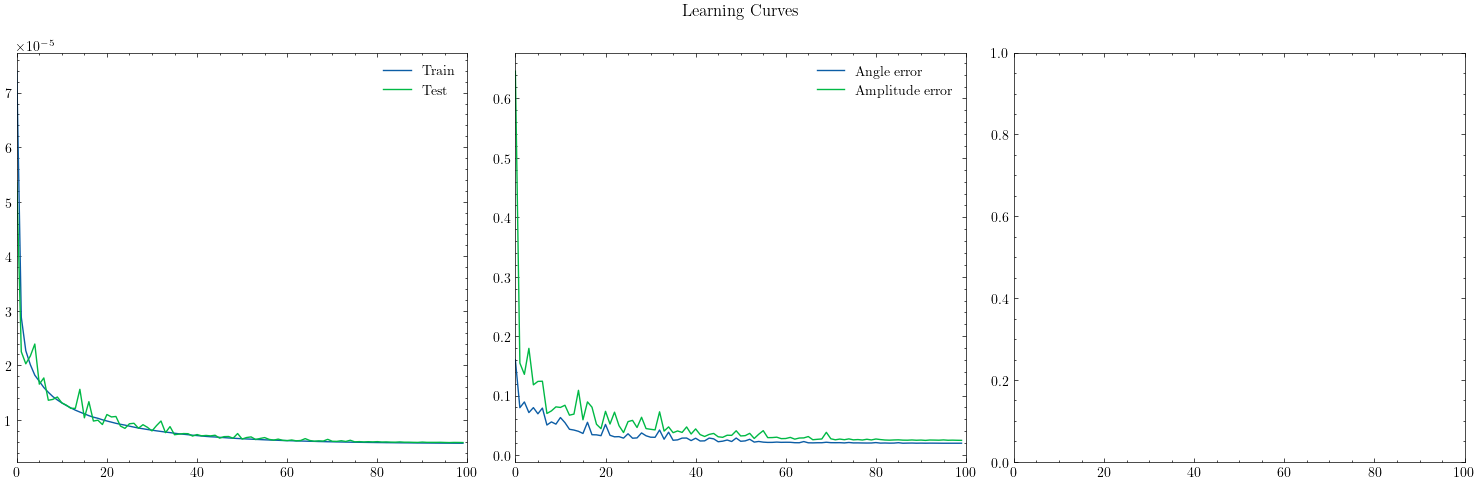

In [9]:
import json

with open("../results/isotropic_chi_v2/different-aardvark-14/training_stats.json", "r") as f:
    stats = json.load(f)

plot_loss(stats=stats, show_plot=True)

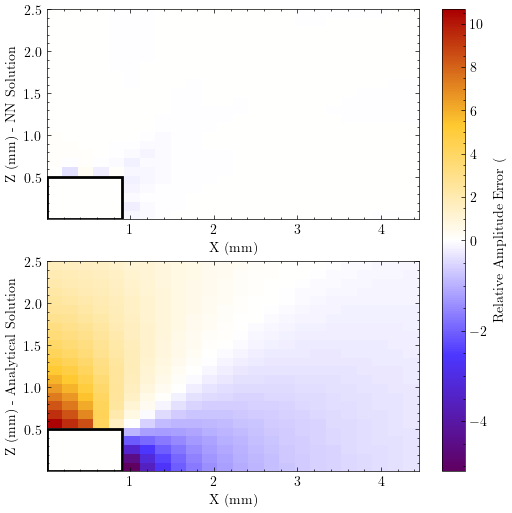

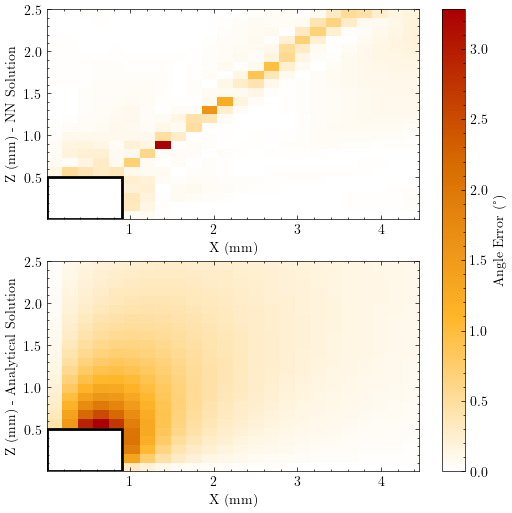

In [ ]:
plot_heatmaps(model, save_path=None, chi_mode=ChiMode.ISOTROPIC, eval_path="../data/isotropic_chi/eval/data_1.npz", tag="tikz")

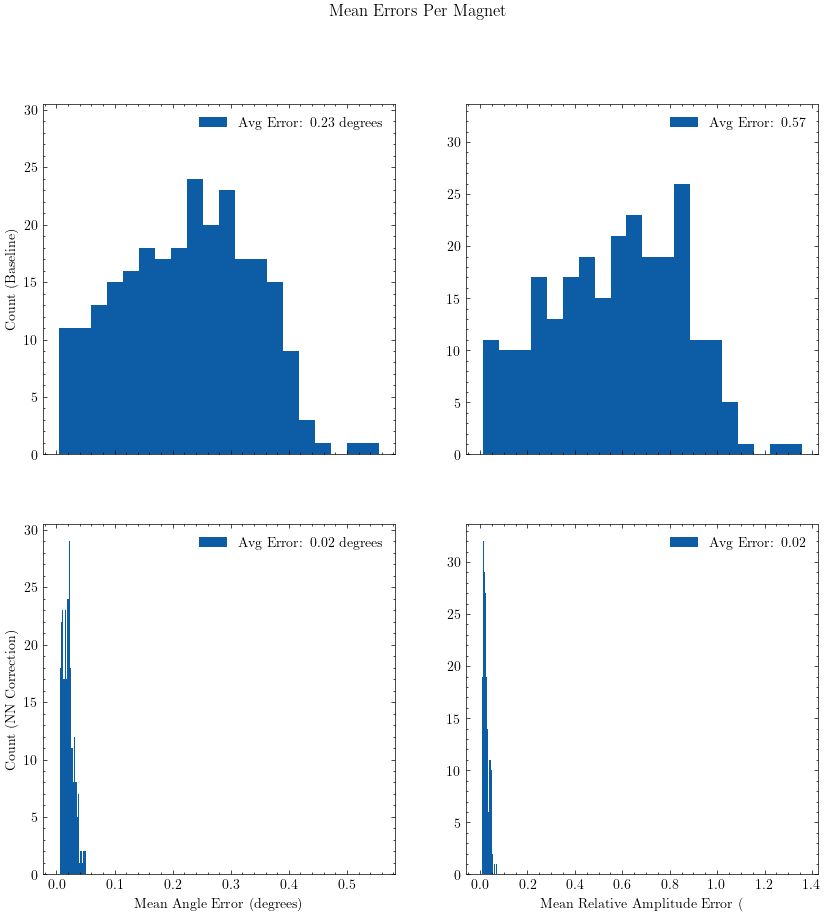

In [5]:
X_test, B_test = get_data_parallel(
    "../data/isotropic_chi/test",
    ChiMode.ISOTROPIC,
)

plot_histograms(
    X_test=X_test,
    B_test=B_test,
    model=model,
    save_path=".",
    show_plot=False,
    tag="isotropic",
)